## 0. Introduction

This project is set to apply CNN to CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html) to classify object categories. 
In this project I first build an initial CNN model and then attempt to increase the model performance by using data augmentation.

## 1. Import CIFAR-10 data & pre-process

In [13]:
from keras.datasets import cifar10
(x_train, y_train_, (x_test, y_test_) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
from keras.utils import to_categorical
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test)


170500096/170498071 [==============================] - 9s 0us/step


## 2. Create an initial CNN model

In [0]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

## 3. Compile modle & define metrics

In [18]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


W0613 23:40:34.355945 139680092915584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0613 23:40:34.388721 139680092915584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## 4. Train model

In [27]:
history = model.fit(x_train, y_train, batch_size=50, epochs=15, verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 9s 176us/step - loss: 0.5256 - acc: 0.8158 - val_loss: 0.6398 - val_acc: 0.7822
Epoch 2/15
50000/50000 [==============================] - 9s 174us/step - loss: 0.5070 - acc: 0.8218 - val_loss: 0.6543 - val_acc: 0.7804
Epoch 3/15
50000/50000 [==============================] - 9s 175us/step - loss: 0.4946 - acc: 0.8237 - val_loss: 0.6271 - val_acc: 0.7954
Epoch 4/15
50000/50000 [==============================] - 9s 175us/step - loss: 0.4863 - acc: 0.8285 - val_loss: 0.6388 - val_acc: 0.7877
Epoch 5/15
50000/50000 [==============================] - 9s 175us/step - loss: 0.4762 - acc: 0.8325 - val_loss: 0.6384 - val_acc: 0.7928
Epoch 6/15
50000/50000 [==============================] - 9s 175us/step - loss: 0.4586 - acc: 0.8385 - val_loss: 0.6339 - val_acc: 0.7956
Epoch 7/15
50000/50000 [==============================] - 9s 176us/step - loss: 0.4604 - acc: 0.8374 - val_loss: 0.6282 - 

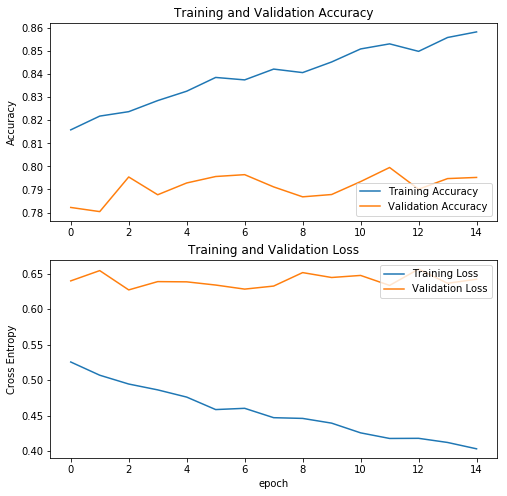

In [28]:
# plot modle performance

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

###  Note: The initial result indicates a sign of overfit, where the accuracy rate on validation set can be improve (~80%)

In [38]:
# try data augmentation 

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow()
epoch =15
steps_per_epoch = round(len(x_train))/epoch
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=50), epochs=15, steps_per_epoch=steps_per_epoch, validation_data=(x_test, y_test))

Epoch 1/15
3334/3333 [==============================] - 86s 26ms/step - loss: 0.8111 - acc: 0.7220 - val_loss: 0.6532 - val_acc: 0.7790
Epoch 2/15
3334/3333 [==============================] - 82s 25ms/step - loss: 0.7620 - acc: 0.7377 - val_loss: 0.6247 - val_acc: 0.7836
Epoch 3/15
3334/3333 [==============================] - 83s 25ms/step - loss: 0.7358 - acc: 0.7451 - val_loss: 0.6070 - val_acc: 0.7959
Epoch 4/15
3334/3333 [==============================] - 81s 24ms/step - loss: 0.7183 - acc: 0.7523 - val_loss: 0.6502 - val_acc: 0.7871
Epoch 5/15
3334/3333 [==============================] - 80s 24ms/step - loss: 0.7070 - acc: 0.7549 - val_loss: 0.6729 - val_acc: 0.7767
Epoch 6/15
3334/3333 [==============================] - 79s 24ms/step - loss: 0.6938 - acc: 0.7609 - val_loss: 0.6003 - val_acc: 0.7967
Epoch 7/15
3334/3333 [==============================] - 81s 24ms/step - loss: 0.6817 - acc: 0.7652 - val_loss: 0.5742 - val_acc: 0.8058
Epoch 8/15
3334/3333 [==========================

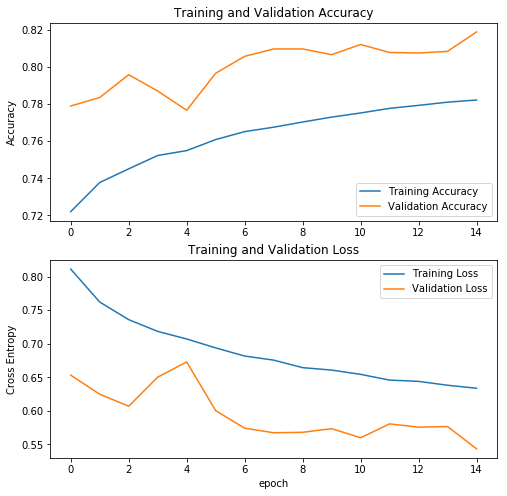

In [39]:
# plot model performance again 

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Note: The model performance has been improved  by ~ 2% (82%) by using data augumentation

In [0]:
# Try to use L2 regularization to increase the model performance

weight_decay = 1e-4

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [45]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=0,  
    width_shift_range=0.1, 
    height_shift_range=0.1,  
    horizontal_flip=True,  
    vertical_flip=False)  

datagen.fit(x_train)


epoch =15
steps_per_epoch = round(len(x_train))/epoch
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=50), epochs=15, steps_per_epoch=steps_per_epoch, validation_data=(x_test, y_test))

Epoch 1/15
3334/3333 [==============================] - 80s 24ms/step - loss: 1.3176 - acc: 0.5272 - val_loss: 1.0053 - val_acc: 0.6529
Epoch 2/15
3334/3333 [==============================] - 79s 24ms/step - loss: 0.9821 - acc: 0.6587 - val_loss: 0.7737 - val_acc: 0.7369
Epoch 3/15
3334/3333 [==============================] - 79s 24ms/step - loss: 0.8915 - acc: 0.6920 - val_loss: 0.7866 - val_acc: 0.7345
Epoch 4/15
3334/3333 [==============================] - 79s 24ms/step - loss: 0.8378 - acc: 0.7136 - val_loss: 0.6846 - val_acc: 0.7725
Epoch 5/15
3334/3333 [==============================] - 79s 24ms/step - loss: 0.8066 - acc: 0.7256 - val_loss: 0.6766 - val_acc: 0.7745
Epoch 6/15
3334/3333 [==============================] - 79s 24ms/step - loss: 0.7834 - acc: 0.7341 - val_loss: 0.6999 - val_acc: 0.7639
Epoch 7/15
3334/3333 [==============================] - 79s 24ms/step - loss: 0.7650 - acc: 0.7405 - val_loss: 0.6552 - val_acc: 0.7843
Epoch 8/15
3334/3333 [==========================

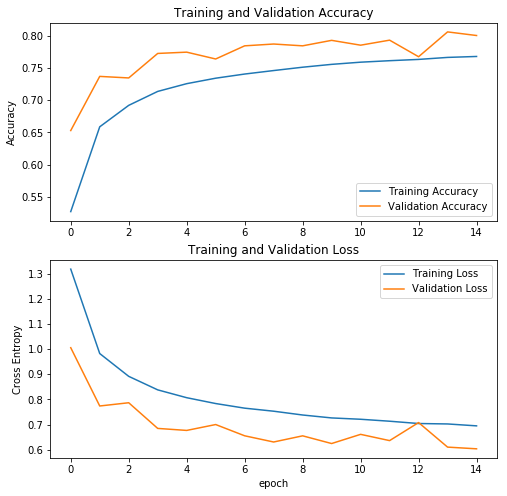

In [46]:
# plot model performance again 

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### note: Adding L2 regularization doesn't increase the model performance (remain around 80%). The best performance in this case is still around 82%.

## References

1. https://medium.com/@siakon/convolutional-nn-with-keras-tensorflow-on-cifar-10-dataset-image-classification-d3aad44691bd

2. https://colab.research.google.com/drive/1AhYf84GIOnMwKPj6XIbAVo3dOWCmBf8p#scrollTo=D6esbeHWT70i

3. https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/     
